In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('data/StudentsPerformance.csv')
df.sample(5) # Get the 5 records from the dataset randomly 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
538,male,group E,bachelor's degree,standard,completed,85,66,71
78,female,group D,some high school,standard,completed,61,74,72
578,female,group B,some college,free/reduced,completed,48,56,58
113,female,group D,some college,standard,none,51,58,54
671,male,group D,associate's degree,free/reduced,none,52,57,50


In [3]:
# shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 1000 rows and 8 columns


##### Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, lunch and test preparation courses.

##### Data Collection

* Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consistes of 8 columns and 1000 rows.

##### Dataset Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [4]:
# Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Observations:

* There are no null values in this dataset.
* There are no duplicate rows in this dataset.
* The dataset has categorical as well as numerical values.
* The mean scores for all the three subjects (maths, reading and writing) are around 66 to 68. The std. dev. is between 14.6 and 15.19
* The minimum score for maths is 0. So, either a student did not appear for the exam or there was an error in entering this data. I will remove it as it seems like an outlier to me. Reading and writing scores have the minimum value as 17 and 10 respectively.

#### Exploratory Data Analysis

In [8]:
# Look at the first 5 rows of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Numerical and Categorical Features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical columns in our dataset and they are: {numerical_features}')
print(f'We have {len(categorical_features)} categorical columns in our dataset and they are: {categorical_features}')

We have 3 numerical columns in our dataset and they are: ['math score', 'reading score', 'writing score']
We have 5 categorical columns in our dataset and they are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [10]:
print("Categories in 'gender' variable:                     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:             ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable: ",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:                      ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:                      ['female' 'male']
Categories in 'race/ethnicity' variable:              ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:                       ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


##### Feature Engineering:
* Adding Total Score and Average Score columns to the dataset.

In [10]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = df['Total Score']/3
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
437,male,group D,associate's degree,free/reduced,none,75,66,73,214,71.333333
416,male,group C,bachelor's degree,standard,completed,71,74,68,213,71.000000
97,female,group E,some college,standard,completed,63,72,70,205,68.333333
474,female,group B,associate's degree,standard,completed,90,90,91,271,90.333333
739,male,group C,high school,free/reduced,none,61,60,55,176,58.666667


##### Exploratory Data Analysis

In [54]:
# 1. Number of students who scored full marks in all the subjects
full_marks_count = df[df['Total Score'] == 300]['Total Score'].count()
print('A. Full Marks statistics:')
print('')
print(f'1. Number of students who scored full marks across all subjects: {full_marks_count}')

# 2. Number of students who scored the highest in each subject
maths_full_marks_count = df[df['math score'] == 100]['math score'].count()
reading_full_marks_count = df[df['reading score'] == 100]['reading score'].count()
writing_full_marks_count = df[df['writing score'] == 100]['writing score'].count()

print(f'2. Number of students who scored full marks in Maths: {maths_full_marks_count}')
print(f'3. Number of students who scored full marks in Reading: {reading_full_marks_count}')
print(f'4. Number of students who scored full marks in Writing: {writing_full_marks_count}')

# Students who have average score less than 40 have failed | Students who receive between 41 and 74 have had average grade | Students who have scored above 75 have good grade

# Create a new column with the categorical data
df['grade'] = pd.cut(df['Average Score'], bins= [0, 40, 75, 100], labels= ['Fail', 'Average', 'Good'], right=False)

# Count the number of students in each category
failed_percentage = df[df['grade'] == 'Fail']['grade'].count()/len(df)*100
good_percentage = df[df['grade'] == 'Good']['grade'].count()/len(df)*100
average_percentage = df[df['grade'] == 'Average']['grade'].count()/len(df)*100

print('')
print('B. Grade Statistics:')
print('')
print(f'5. The percentage of students who scored a fail grade: {failed_percentage} %')
print(f'6. The percentage of students who scored a good grade: {good_percentage} %')
print(f'7. The percentage of students who scored an avg grade: {round(average_percentage,2)} %')

A. Full Marks statistics:

1. Number of students who scored full marks across all subjects: 3
2. Number of students who scored full marks in Maths: 7
3. Number of students who scored full marks in Reading: 17
4. Number of students who scored full marks in Writing: 14

B. Grade Statistics:

5. The percentage of students who scored a fail grade: 3.0 %
6. The percentage of students who scored a good grade: 32.1 %
7. The percentage of students who scored an avg grade: 64.6 %


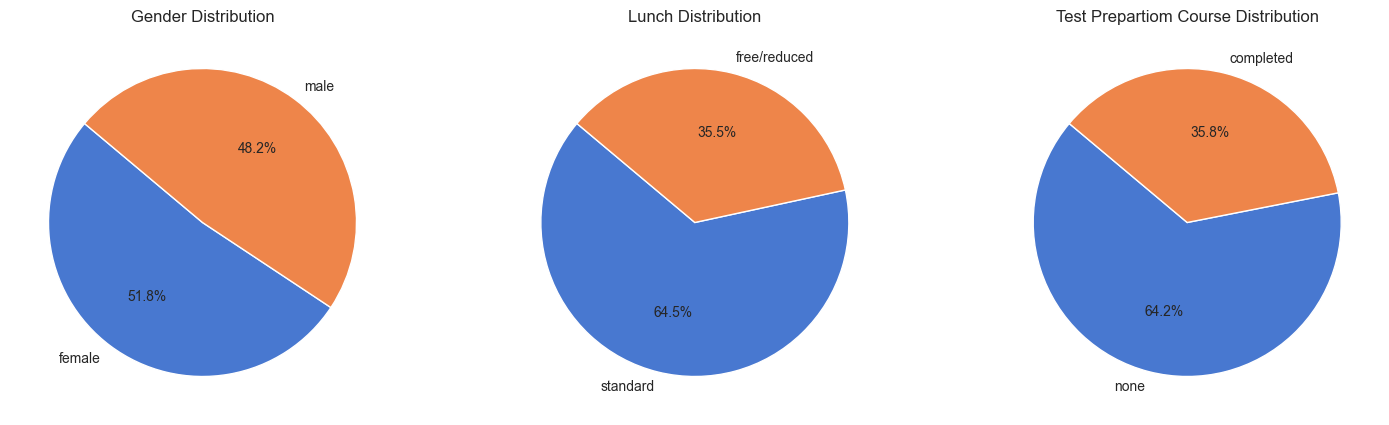

In [170]:
# Univariate Analysis (Categorical Features):

sns.set_palette('muted')

gender_counts = df['gender'].value_counts()
lunch_counts = df['lunch'].value_counts()
test_preparation_counts = df['test preparation course'].value_counts()

# Create a pie chart
plt.subplots(1,3, figsize = (18,5))
plt.subplot(131)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')

plt.subplot(132)
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Lunch Distribution')

plt.subplot(133)
plt.pie(test_preparation_counts, labels=test_preparation_counts.index, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Test Prepartiom Course Distribution')
plt.show()

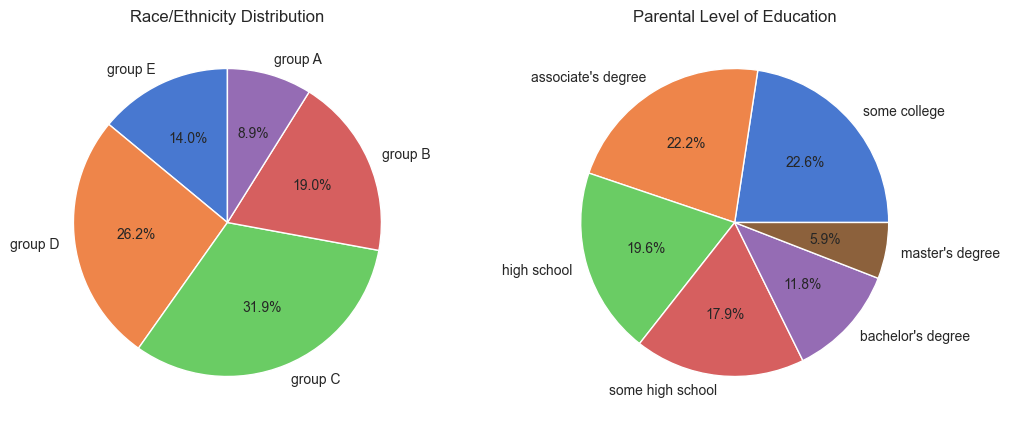

In [171]:
race_ethnicity_counts = df['race/ethnicity'].value_counts().sort_index(ascending = False)
parental_education_counts = df['parental level of education'].value_counts()


plt.subplots(1,2, figsize = (12,5))
plt.subplot(121)
plt.pie(race_ethnicity_counts, labels=race_ethnicity_counts.index, autopct='%1.1f%%', startangle=90)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Race/Ethnicity Distribution')

plt.subplot(122)
plt.pie(parental_education_counts,labels = parental_education_counts.index,autopct='%1.1f%%')
plt.title('Parental Level of Education')

plt.show()



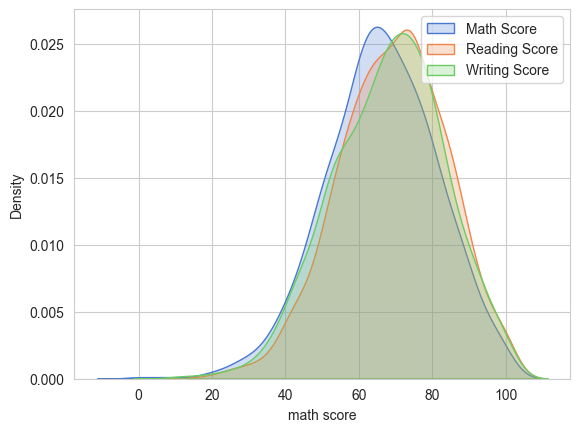

In [203]:
sns.kdeplot(df['math score'], shade=True, label = 'Math Score')
sns.kdeplot(df['reading score'], shade=True, label = 'Reading Score')
sns.kdeplot(df['writing score'], shade=True, label = 'Writing Score')
plt.legend()
plt.show()

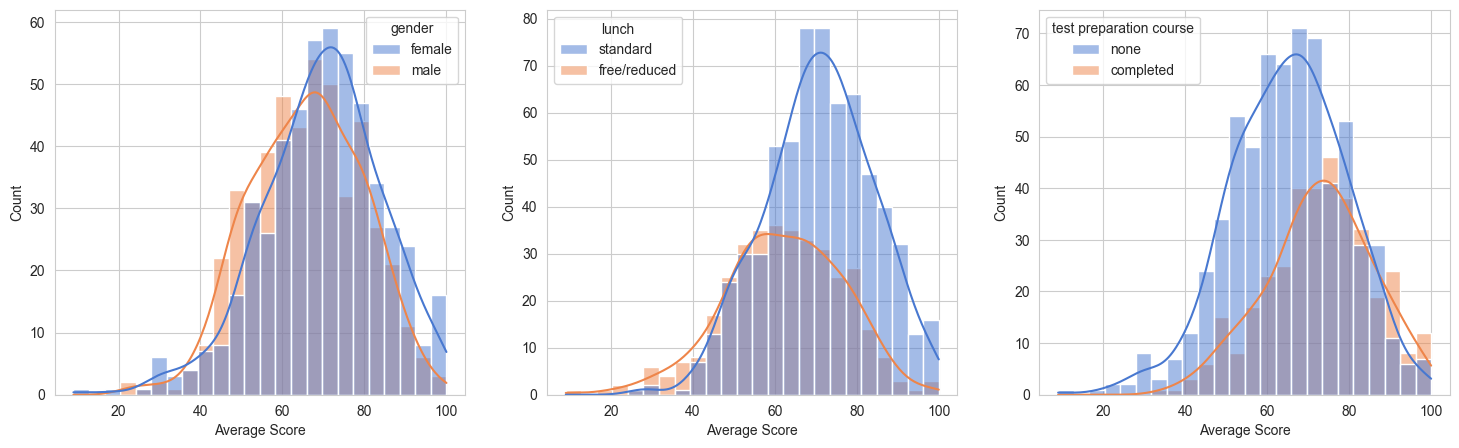

In [172]:
sns.set_palette('muted')
plt.subplots(1,3,figsize = (18,5))
plt.subplot(131)
sns.histplot(data = df,x='Average Score',kde = True,hue = 'gender')
plt.subplot(132)
sns.histplot(data = df,x='Average Score',kde = True,hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df,x='Average Score',kde = True,hue = 'test preparation course')
plt.show()

##### Observations:
* Overall, females have scored slightly better than males when it comes to average score across all the subjects.
* Students who have standard lunch seem to perform much better than the students who have free/reduced lunch.
* The studetns who have completed Test Prep do not perform better than the students whho have not completed the test prep.

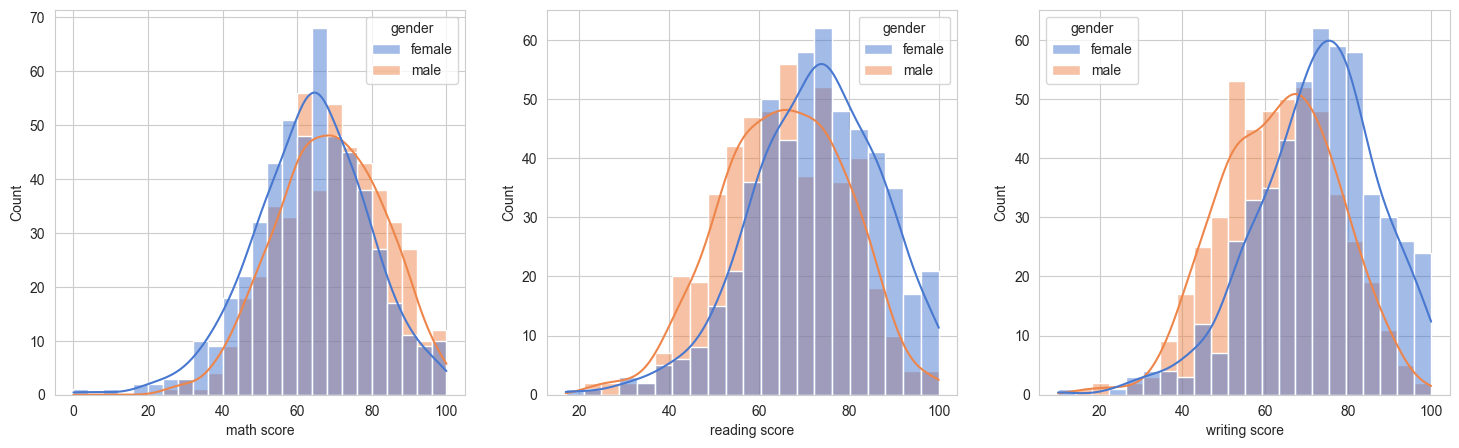

In [173]:
plt.subplots(1,3,figsize = (18,5))
plt.subplot(131)
sns.histplot(data = df,x='math score',kde = True,hue = 'gender')
plt.subplot(132)
sns.histplot(data = df,x='reading score',kde = True,hue = 'gender')
plt.subplot(133)
sns.histplot(data = df,x='writing score',kde = True,hue = 'gender')
plt.show()

##### Observations:
* Male students score better in maths as compared to the female students. In reading and writing, female students score better than the male students.

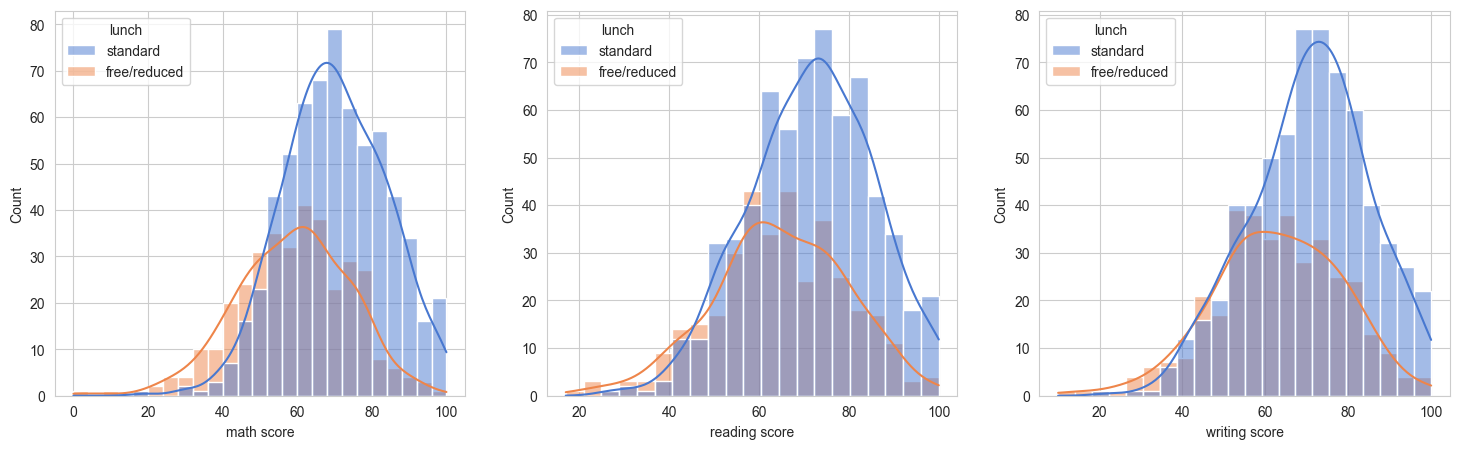

In [174]:
plt.subplots(1,3,figsize = (18,5))
plt.subplot(131)
sns.histplot(data = df,x='math score',kde = True,hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df,x='reading score',kde = True,hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df,x='writing score',kde = True,hue = 'lunch')
plt.show()